# Lab 11: Data Cleaning & EDA for Classification

In this section of Lab 11, we will focus on preparing the Nashville police stops dataset (from lab3!) for classification tasks. Our primary goals are to clean the dataset by dealing with null values and to address potential issues of data leakage.



In [1]:
# Just run this cell
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

We're going to be using Nashville Police Stop dataset, like we did in lab 3.

In [2]:
# Loading the dataset.
police_stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville.csv").sample(n=1000, random_state = 42).reset_index()
police_stops.head(5)

C:\Users\Jessi\AppData\Local\Temp\ipykernel_73888\383709369.py:2: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  police_stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville.csv").sample(n=1000, random_state = 42).reset_index()


,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


## Data Preparation

In revisiting the essentials of data operations from Lab 3 and Lab 6, we're reminded of the crucial role of data cleaning in enhancing our analytical outcomes. Here are some concise, yet effective strategies:



1.   Addressing Missing Data

    * Crucial to identify and manage missing data to avoid skewed analyses.
    * Strategies include either removing or statistically imputing missing values, depending on their impact and prevalence.


2.   Recode Categorical Variables
 *   Transform categorical variables into binary (0 or 1) format, known as one-hot encoding, to simplify analysis and model integration.
 * More on this later!

3. Standardize Scale
  *   Align all variables to a consistent scale for better comparability and interpretation of results.










✅ **Question 1:** Clean the dataset so that it doesn't have null values.


Hint: There's pandas function that does this for you.

In [3]:
# SOLUTION
# Replace null values with zero
police_stops.fillna(0, inplace=True)

police_stops.head(3)

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,0,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False


## Data Preparation:

#### One Hot Encoding:

Notice that a few of the variables that are numeric/integer actually encode categorical data. In order to analyze the dataset, we can convert these to their true categorical values.

In addition, the time field is currently in ______. In order to make this field easier to understand and analyze, we will convert it to the traditional 24 hour scale.

In [ ]:
police_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1000 non-null   int64  
 1   raw_row_number                  1000 non-null   object 
 2   date                            1000 non-null   object 
 3   time                            1000 non-null   float64
 4   location                        1000 non-null   object 
 5   lat                             1000 non-null   float64
 6   lng                             1000 non-null   float64
 7   precinct                        1000 non-null   object 
 8   reporting_area                  1000 non-null   float64
 9   zone                            1000 non-null   object 
 10  subject_age                     1000 non-null   float64
 11  subject_race                    1000 non-null   object 
 12  subject_sex                     100

Before doing analysis, we're going to decode the `time` field:

1. `time`: Convert to `____`.  

In [4]:
# Just run this cell.
police_encoded = police_stops.replace({'' : {0 : 'no', 1 : 'yes'}})
police_encoded.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,0,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,0,N,False,False,False,False,False,False,False


### Dealing with Data Leakage

In the context of criminal justice datasets like the Nashville police stops, it's crucial to identify and eliminate data leakage to ensure our models are predictive, not just reflective of post-event outcomes.



*   What is Data Leakage?
  *   Data leakage occurs when information from outside the training dataset, particularly features that would not be available at the time of prediction, inadvertently influences the model.
  *   This can lead to overly optimistic performance estimates and poor generalization to new data.


*  Leakage in Criminal Justice Datasets
  *    In datasets related to criminal justice, leakage can manifest through variables that contain information about events or outcomes that occur after the police stop (e.g., the result of a legal case).
  *   Using such data in predictive models can result in biased and unreliable predictions.








It seems like data leakage is a crucial issue that we need to deal with! Here're some strategies to mitigate leakage.



1.   Identify Potential Leaky Variables
  * Carefully review each variable to determine if it contains post-event information or outcomes that would not be known at the time of the police stop.
2.   Remove Leaky Variables
  * Once identified, these variables should be removed from the dataset to prevent their influence on the model.



In [5]:
# Inspect the features of the dataset (i.e. all columns in dataset)
police_stops.columns.values

array(['index', 'raw_row_number', 'date', 'time', 'location', 'lat',
       'lng', 'precinct', 'reporting_area', 'zone', 'subject_age',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type',
       'violation', 'arrest_made', 'citation_issued', 'warning_issued',
       'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'frisk_performed', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent',
       'raw_search_arrest', 'raw_search_warrant', 'raw_search_inventory',
       'raw_search_plain_view'], dtype=object)

Notice this about the columns above.


*   Outcome Variables
    * These reflect events or decisions made during or after a police stop and would not be known beforehand.
*   Search-Related Variables
    * These are also tied to the outcome of a search, which is a post-event activity.

Let's classify the columns into outcome variables and search related variables.



In [6]:
outcome_vars = ['arrest_made', 'citation_issued', 'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs', 'contraband_weapons', 'frisk_performed', 'search_conducted', 'search_person', 'search_vehicle']
search_related_vars = ['search_basis', 'raw_search_consent', 'raw_search_arrest', 'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view']

## Feature Selection

Now we're finally ready to do some analysis!

In this section, we will focus on identifying which features in the Nashville police stops dataset are most relevant for predicting the outcome `search_conducted`.
Feature selection is crucial in machine learning as it helps in reducing the dimensionality of the data, improving model performance, and enhancing interpretability.

Our goal is to use the correlation coefficient to measure the relationship between each feature and the `search_conducted` variable. This method helps in pinpointing features that have a stronger linear relationship with the target variable.

To further our analysis, we're going to generate a correlation heatmap, which is a visual tool used in feature selection to identify how each feature is correlated with the target variable, which is search_conducted in our case.

Don't worry if you don't really understand what we're doing here. Once you create the heatmap, we're gonna walk you through the analysis.

Hint: Pandas has a built-in function that computes pairwise correlation of columns.
To learn more, visit here: [correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

To learn about seaborn's heatmap, visit here: [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

You might find this helpful for one-hot encoding categorical variables: [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

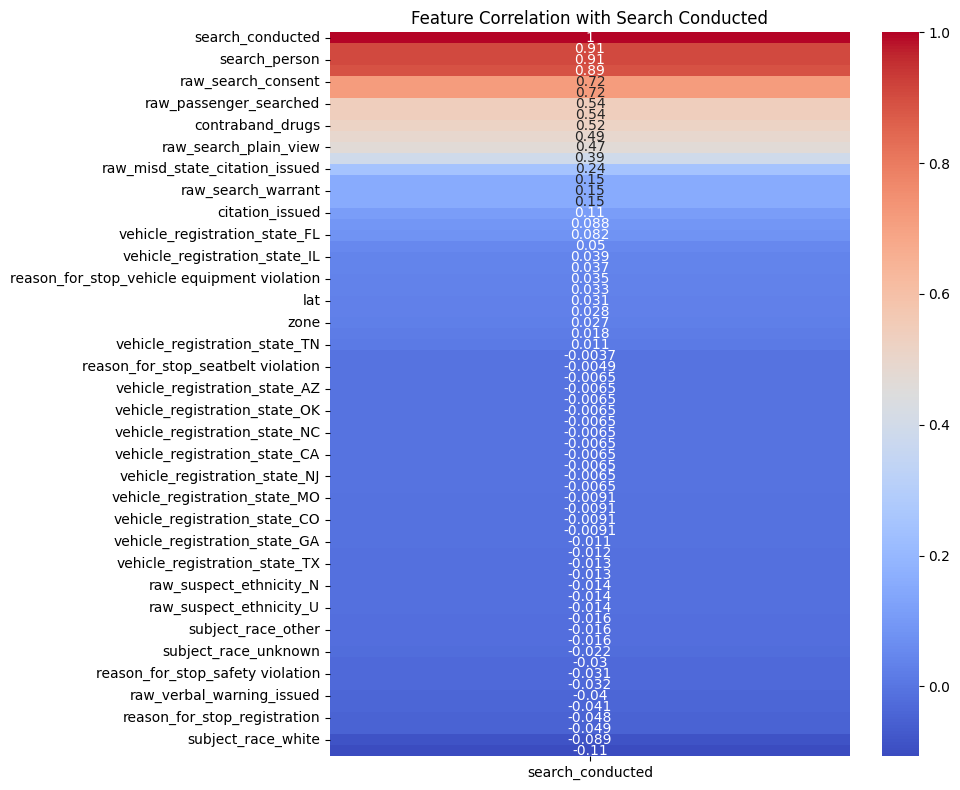

In [74]:
# One-hot encode categorical variables
police_stops_without_categorical = police_stops.drop(['date', 'location', 'raw_row_number', 'officer_id_hash', 'violation', 'outcome', 'search_basis', 'notes', 'type'], axis=1)
police_stops_encoded = pd.get_dummies(police_stops_without_categorical, columns=['subject_race', 'subject_sex', 'reason_for_stop', 'vehicle_registration_state', 'raw_suspect_ethnicity'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = police_stops_encoded.corr()

# Isolate the correlation coefficients with the target variable 'search_conducted'
search_conducted_correlation = correlation_matrix['search_conducted'].sort_values(ascending=False)

# Visualize the correlation coefficients using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(search_conducted_correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Search Conducted")
plt.tight_layout()
plt.show()

### Understanding the heatmap

Now that we've generated correlation heatmap, let's interpret the result.


1. Understanding Correlation Heatmap
  *   The heatmap displays the correlation coefficients between features and the target variable search_conducted.
  *   Correlation coefficients range from -1 to 1, where values close to 1 or -1 indicate a strong relationship, and values close to 0 indicate no relationship.
  * A positive correlation means that as one feature increases, the target variable tends to increase. A negative correlation means that as one feature increases, the target variable tends to decrease.

2.   Interpreting the Results
  *   Features that show higher absolute values of correlation are typically considered more important for prediction.
  *   For example, features like search_person, raw_search_consent, and raw_passenger_searched have high positive correlation coefficients, suggesting they're good predictors for search_conducted.

Remember to not solely rely on correlation for feature selection, as correlation does not imply causation. You should consider the context and meaning of each feature, and be aware of potential ethical and legal implications, especially in sensitive areas such as criminal justice.




✅ Which features are most highly correlated with search_conducted? Why might these features have strong correlations?

In [ ]:
# sample answer
solution = "Features such as search_person, raw_search_consent, and raw_passenger_searched might show strong correlations with search_conducted because they are directly related to the event of a search being conducted. For instance, if an officer decides to search a person, this is inherently tied to whether any search was conducted at all. These actions are part of the protocol for stops that lead to searches, hence the strong correlation."
print(solution)



Features such as search_person, raw_search_consent, and raw_passenger_searched might show strong correlations with search_conducted because they are directly related to the event of a search being conducted. For instance, if an officer decides to search a person, this is inherently tied to whether any search was conducted at all. These actions are part of the protocol for stops that lead to searches, hence the strong correlation.


✅ Discuss the potential implications of using these features in a predictive model within the criminal justice system. How might this affect fairness and accuracy?

In [ ]:
# sample answer
solution = "Using features that have strong correlations with outcomes like search_conducted in a predictive model within criminal justice can have significant implications. If the model is based on biased data, it may reinforce those biases. For example, if searches are more frequently conducted on certain demographic groups, the model may unfairly target those groups in the future. This can affect both the fairness of the model and the accuracy of its predictions, potentially leading to mistrust in the judicial system and unequal treatment under the law. It is crucial to ensure that predictive models in criminal justice are transparent, accountable, and equitable."
print(solution)

Using features that have strong correlations with outcomes like search_conducted in a predictive model within criminal justice can have significant implications. If the model is based on biased data, it may reinforce those biases. For example, if searches are more frequently conducted on certain demographic groups, the model may unfairly target those groups in the future. This can affect both the fairness of the model and the accuracy of its predictions, potentially leading to mistrust in the judicial system and unequal treatment under the law. It is crucial to ensure that predictive models in criminal justice are transparent, accountable, and equitable.
